In [3]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [4]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [5]:
!ln -s /mnt/lanlep2019 ~/

In [6]:
os.chdir("/mnt/lanlep2019/")

In [7]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

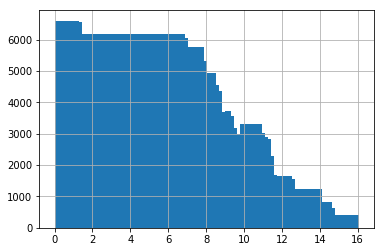

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [30]:
rawydf=ydf


In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [40]:
def align_q(t):
    print 'align to ', t
    ydf=rawydf.copy()
    for qno in quakes:
        r=t/quake_duration[qno]
        print qno, r
        ydf.loc[qdf['index']==qno] *= r
    return ydf

align to  11
1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


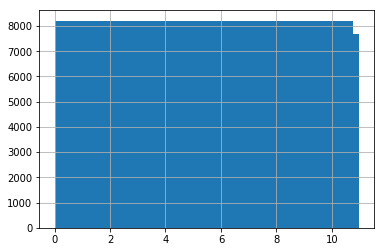

In [41]:
align_q(11).hist(bins=50);

In [36]:
import utils
n_thread= utils.get_num_thread()
n_thread

15

In [37]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    1.081939
quake_06_0120_099000    1.475855
quake_07_0296_013500    0.829115
quake_03_0090_034500    1.081939
quake_08_0137_055500    0.507157
Name: index, dtype: float64

In [55]:
def make_sub(model, qno, aqno):
    fname =os.path.join(config.INPUT_PATH, "sub", "sub101_q{}_a{}sv".format(qno, aqno))
    print "write to " + fname    
    p = model.predict(testdf.values, num_iteration = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [56]:
def train_quake(qno, aqno, params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno, 'align to ', aqno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    t=config.quake_length[aqno]
    ydf=align_q(t)
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=Wtr,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[Wtr,None],
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, qno, aqno)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [57]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'mae',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [58]:
best_mae=1e10

In [59]:
def lgbcv(aqno, learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf):
    d=locals()
    del d['aqno']
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno, aqno, newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [60]:
best={'colsample_bytree': 0.5875234801883905,
 'learning_rate': 0.006482026186601724,
 'max_depth': 3.508151409749427,
 'min_data_in_leaf': 937.0226079254434,
 'min_sum_hessian_in_leaf': 0.04798258088419906,
 'num_leaves': 55.713093951739616,
 'reg_alpha': 0.4305580312875054,
 'reg_lambda': 6.56454816601066,
 'subsample': 0.4555816023368043}

In [61]:
for aqno in quakes:
    a=lgbcv(aqno, **best)
    print "cv score", a
    print "\n\nXXXXXXXXXXXXXXXXXXXXXXXXXXX"
    

valid quake 1 align to  1
align to  11.5405663956
1 1.0
2 0.813850542753
3 1.30309950431
4 0.909144249812
5 1.43270375717
6 1.63481537943
7 0.716493833541
8 1.45969589357
9 1.19750497829
10 1.00996275786
11 1.04680566946
12 1.30718244899
13 1.34728605396
14 0.782329617588
15 1.21999776536
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.16405	valid_1's l1: 1.35078
[200]	training's l1: 1.09384	valid_1's l1: 1.28947
[300]	training's l1: 1.06238	valid_1's l1: 1.27503
[400]	training's l1: 1.03601	valid_1's l1: 1.27331
[500]	training's l1: 1.01424	valid_1's l1: 1.27437
Early stopping, best iteration is:
[439]	training's l1: 1.02733	valid_1's l1: 1.27204
write to /home/hadoop/lanlep2019/input/sub/sub101_q1_a1sv
quake  1 (1.2720426635720916, 439)
valid quake 2 align to  1
align to  11.5405663956
1 1.0
2 0.813850542753
3 1.30309950431
4 0.909144249812
5 1.43270375717
6 1.63481537943
7 0.716493833541
8 1.45969589

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.1937	valid_1's l1: 1.06422
[200]	training's l1: 1.11435	valid_1's l1: 1.04657
[300]	training's l1: 1.0833	valid_1's l1: 1.04023
[400]	training's l1: 1.05657	valid_1's l1: 1.04119
Early stopping, best iteration is:
[344]	training's l1: 1.07017	valid_1's l1: 1.03636
write to /home/hadoop/lanlep2019/input/sub/sub101_q11_a1sv
quake  11 (1.0363602139036159, 344)
valid quake 12 align to  1
align to  11.5405663956
1 1.0
2 0.813850542753
3 1.30309950431
4 0.909144249812
5 1.43270375717
6 1.63481537943
7 0.716493833541
8 1.45969589357
9 1.19750497829
10 1.00996275786
11 1.04680566946
12 1.30718244899
13 1.34728605396
14 0.782329617588
15 1.21999776536
(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.18556	valid_1's l1: 1.07521
[200]	training's l1: 1.11654	valid_1's l1: 1.00613
[300]	training's l1: 1.08446	valid_1's l1: 0.99082
[

3 1.60115332712
4 1.11708993489
5 1.7604015503
6 2.00874152384
7 0.88037519901
8 1.79356751257
9 1.47140649958
10 1.240968341
11 1.28623821509
12 1.60617015081
13 1.65544652634
14 0.961269393446
15 1.4990439906
(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.43421	valid_1's l1: 1.82502
[200]	training's l1: 1.33645	valid_1's l1: 1.75797
[300]	training's l1: 1.29836	valid_1's l1: 1.74093
[400]	training's l1: 1.26424	valid_1's l1: 1.73513
[500]	training's l1: 1.23666	valid_1's l1: 1.73002
Early stopping, best iteration is:
[478]	training's l1: 1.24185	valid_1's l1: 1.72957
write to /home/hadoop/lanlep2019/input/sub/sub101_q7_a2sv
quake  7 (1.729574508209483, 478)
valid quake 8 align to  2
align to  14.1802035992
1 1.22872683308
2 1.0
3 1.60115332712
4 1.11708993489
5 1.7604015503
6 2.00874152384
7 0.88037519901
8 1.79356751257
9 1.47140649958
10 1.240968341
11 1.28623821509
12 1.60617015081
13 1.6554465263

[100]	training's l1: 0.899091	valid_1's l1: 1.09508
[200]	training's l1: 0.841943	valid_1's l1: 1.0553
[300]	training's l1: 0.817117	valid_1's l1: 1.05016
Early stopping, best iteration is:
[244]	training's l1: 0.829835	valid_1's l1: 1.04965
write to /home/hadoop/lanlep2019/input/sub/sub101_q2_a3sv
quake  2 (1.049648370374744, 244)
valid quake 3 align to  3
align to  8.85624340845
1 0.767401105361
2 0.624549806107
3 1.0
4 0.697678302238
5 1.09945844691
6 1.25455912923
7 0.549838159843
8 1.12017224221
9 0.918966644018
10 0.775046536758
11 0.803319827844
12 1.00313325626
13 1.03390880705
14 0.600360613293
15 0.936227633676
(386763, 450) (386763,) (22631, 450) (22631,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.917963	valid_1's l1: 0.748621
[200]	training's l1: 0.861883	valid_1's l1: 0.690668
[300]	training's l1: 0.839009	valid_1's l1: 0.677171
[400]	training's l1: 0.818122	valid_1's l1: 0.676828
Early stopping, best iteration is:
[329]	training'

5 1.09945844691
6 1.25455912923
7 0.549838159843
8 1.12017224221
9 0.918966644018
10 0.775046536758
11 0.803319827844
12 1.00313325626
13 1.03390880705
14 0.600360613293
15 0.936227633676
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.907842	valid_1's l1: 0.942062
[200]	training's l1: 0.850431	valid_1's l1: 0.867052
[300]	training's l1: 0.826719	valid_1's l1: 0.851276
[400]	training's l1: 0.806913	valid_1's l1: 0.846129
Early stopping, best iteration is:
[387]	training's l1: 0.80922	valid_1's l1: 0.845379
write to /home/hadoop/lanlep2019/input/sub/sub101_q13_a3sv
quake  13 (0.8453792366473195, 387)
valid quake 14 align to  3
align to  8.85624340845
1 0.767401105361
2 0.624549806107
3 1.0
4 0.697678302238
5 1.09945844691
6 1.25455912923
7 0.549838159843
8 1.12017224221
9 0.918966644018
10 0.775046536758
11 0.803319827844
12 1.00313325626
13 1.03390880705
14 0.600360613293
15 0.936227633676
(371633, 450)

[100]	training's l1: 1.29304	valid_1's l1: 1.66657
[200]	training's l1: 1.21265	valid_1's l1: 1.5687
[300]	training's l1: 1.18004	valid_1's l1: 1.54336
[400]	training's l1: 1.15013	valid_1's l1: 1.5353
Early stopping, best iteration is:
[385]	training's l1: 1.15414	valid_1's l1: 1.53374
write to /home/hadoop/lanlep2019/input/sub/sub101_q8_a4sv
quake  8 (1.5337423660374496, 385)
valid quake 9 align to  4
align to  12.6938782244
1 1.09993546151
2 0.895183072347
3 1.43332535467
4 1.0
5 1.57588166836
6 1.79819140886
7 0.788096975468
8 1.60557127636
9 1.31717819097
10 1.11089385218
11 1.15141867716
12 1.43781633031
13 1.48192770756
14 0.860512088978
15 1.34191880509
(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.31089	valid_1's l1: 1.12146
[200]	training's l1: 1.23073	valid_1's l1: 1.06816
[300]	training's l1: 1.19644	valid_1's l1: 1.05948
[400]	training's l1: 1.16657	valid_1's l1: 1.057
Early stopping, bes

3 0.909538694083
4 0.634565411907
5 1.0
6 1.14107007205
7 0.500099081861
8 1.01883999833
9 0.835835721306
10 0.704934814896
11 0.730650467148
12 0.91238851189
13 0.940380066161
14 0.546051208193
15 0.851535259298
(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.828072	valid_1's l1: 0.814416
[200]	training's l1: 0.774479	valid_1's l1: 0.798902
[300]	training's l1: 0.751154	valid_1's l1: 0.79707
Early stopping, best iteration is:
[297]	training's l1: 0.751904	valid_1's l1: 0.796187
write to /home/hadoop/lanlep2019/input/sub/sub101_q4_a5sv
quake  4 (0.7961872437310026, 297)
valid quake 5 align to  5
align to  8.0550960642
1 0.697980999207
2 0.568052215036
3 0.909538694083
4 0.634565411907
5 1.0
6 1.14107007205
7 0.500099081861
8 1.01883999833
9 0.835835721306
10 0.704934814896
11 0.730650467148
12 0.91238851189
13 0.940380066161
14 0.546051208193
15 0.851535259298
(388820, 450) (388820,) (20574, 450) (20574

(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.804505	valid_1's l1: 1.05866
[200]	training's l1: 0.751559	valid_1's l1: 1.04236
[300]	training's l1: 0.727919	valid_1's l1: 1.04427
Early stopping, best iteration is:
[236]	training's l1: 0.741969	valid_1's l1: 1.04149
write to /home/hadoop/lanlep2019/input/sub/sub101_q14_a5sv
quake  14 (1.0414915347460105, 236)
valid quake 15 align to  5
align to  8.0550960642
1 0.697980999207
2 0.568052215036
3 0.909538694083
4 0.634565411907
5 1.0
6 1.14107007205
7 0.500099081861
8 1.01883999833
9 0.835835721306
10 0.704934814896
11 0.730650467148
12 0.91238851189
13 0.940380066161
14 0.546051208193
15 0.851535259298
(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.824807	valid_1's l1: 0.839569
[200]	training's l1: 0.772216	valid_1's l1: 0.832075
Early stopping, best iteration is:
[185]	

[200]	training's l1: 0.68443	valid_1's l1: 0.595214
[300]	training's l1: 0.665681	valid_1's l1: 0.592083
[400]	training's l1: 0.648695	valid_1's l1: 0.591005
Early stopping, best iteration is:
[352]	training's l1: 0.656683	valid_1's l1: 0.589303
write to /home/hadoop/lanlep2019/input/sub/sub101_q9_a6sv
quake  9 (0.5893034652144407, 352)
valid quake 10 align to  6
align to  7.05924750941
1 0.61168986577
2 0.497824129253
3 0.797092760874
4 0.556114324133
5 0.876370368913
6 1.0
7 0.438272016864
8 0.892881185201
9 0.732501659432
10 0.61778398379
11 0.640320419441
12 0.799590256757
13 0.824121225501
14 0.47854309877
15 0.746260269333
(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.727724	valid_1's l1: 0.669542
[200]	training's l1: 0.681459	valid_1's l1: 0.646098
[300]	training's l1: 0.661709	valid_1's l1: 0.638598
[400]	training's l1: 0.645094	valid_1's l1: 0.636726
Early stopping, best iteration is:
[361]	t

(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.64645	valid_1's l1: 1.95148
[200]	training's l1: 1.54475	valid_1's l1: 1.85615
[300]	training's l1: 1.49969	valid_1's l1: 1.84167
[400]	training's l1: 1.46275	valid_1's l1: 1.82894
Early stopping, best iteration is:
[397]	training's l1: 1.46359	valid_1's l1: 1.82874
write to /home/hadoop/lanlep2019/input/sub/sub101_q5_a7sv
quake  5 (1.8287359874747562, 397)
valid quake 6 align to  7
align to  16.1070003053
1 1.3956854242
2 1.13587934
3 1.81871698444
4 1.26887937795
5 1.99960375108
6 2.28168799632
7 1.0
8 2.03727628241
9 1.67134024361
10 1.40959030013
11 1.46101141484
12 1.82441549082
13 1.88038750774
14 1.09188604418
15 1.70273309867
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.61847	valid_1's l1: 2.08299
[200]	training's l1: 1.51717	valid_1's l1: 2.03747
[300]	training'

4 0.622831271786
5 0.981508383689
6 1.1199698421
7 0.490851441522
8 1.0
9 0.820379767849
10 0.691899430775
11 0.717139559053
12 0.895516973602
13 0.922990918792
14 0.535953838766
15 0.835788996008
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.797413	valid_1's l1: 0.926326
[200]	training's l1: 0.74908	valid_1's l1: 0.884516
[300]	training's l1: 0.726784	valid_1's l1: 0.87597
[400]	training's l1: 0.709275	valid_1's l1: 0.873859
[500]	training's l1: 0.693334	valid_1's l1: 0.87276
Early stopping, best iteration is:
[494]	training's l1: 0.694338	valid_1's l1: 0.872253
write to /home/hadoop/lanlep2019/input/sub/sub101_q1_a8sv
quake  1 (0.8722534532585055, 494)
valid quake 2 align to  8
align to  7.90614431843
1 0.685074202378
2 0.557548011431
3 0.892719853532
4 0.622831271786
5 0.981508383689
6 1.1199698421
7 0.490851441522
8 1.0
9 0.820379767849
10 0.691899430775
11 0.717139559053
12 0.895516973602
13 0.92

2 0.557548011431
3 0.892719853532
4 0.622831271786
5 0.981508383689
6 1.1199698421
7 0.490851441522
8 1.0
9 0.820379767849
10 0.691899430775
11 0.717139559053
12 0.895516973602
13 0.922990918792
14 0.535953838766
15 0.835788996008
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.817821	valid_1's l1: 0.726928
[200]	training's l1: 0.762878	valid_1's l1: 0.715338
[300]	training's l1: 0.742278	valid_1's l1: 0.713201
Early stopping, best iteration is:
[273]	training's l1: 0.747013	valid_1's l1: 0.712395
write to /home/hadoop/lanlep2019/input/sub/sub101_q11_a8sv
quake  11 (0.7123947131460816, 273)
valid quake 12 align to  8
align to  7.90614431843
1 0.685074202378
2 0.557548011431
3 0.892719853532
4 0.622831271786
5 0.981508383689
6 1.1199698421
7 0.490851441522
8 1.0
9 0.820379767849
10 0.691899430775
11 0.717139559053
12 0.895516973602
13 0.922990918792
14 0.535953838766
15 0.835788996008
(386834, 450) (3868

[100]	training's l1: 0.9685	valid_1's l1: 1.24961
[200]	training's l1: 0.906942	valid_1's l1: 1.22144
[300]	training's l1: 0.879165	valid_1's l1: 1.21738
Early stopping, best iteration is:
[264]	training's l1: 0.889151	valid_1's l1: 1.21406
write to /home/hadoop/lanlep2019/input/sub/sub101_q6_a9sv
quake  6 (1.2140637624801236, 264)
valid quake 7 align to  9
align to  9.63717613267
1 0.835069597309
2 0.679621845007
3 1.08817877832
4 0.759198722586
5 1.19640734957
6 1.36518462057
7 0.59832221705
8 1.21894766204
9 1.0
10 0.843389193507
11 0.87415558886
12 1.09158832128
13 1.12507762254
14 0.653299678722
15 1.01878304264
(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.974853	valid_1's l1: 1.24238
[200]	training's l1: 0.908084	valid_1's l1: 1.19363
[300]	training's l1: 0.881739	valid_1's l1: 1.1834
[400]	training's l1: 0.859793	valid_1's l1: 1.17955
[500]	training's l1: 0.841452	valid_1's l1: 1.17602
Early s

3 1.29024510474
4 0.900176014148
5 1.41857087899
6 1.6186887751
7 0.709425994139
8 1.44529675199
9 1.18569221387
10 1.0
11 1.03647947542
12 1.2942877733
13 1.33399577704
14 0.774612342382
15 1.20796312128
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.15936	valid_1's l1: 1.41188
[200]	training's l1: 1.08595	valid_1's l1: 1.35949
[300]	training's l1: 1.05438	valid_1's l1: 1.35347
Early stopping, best iteration is:
[288]	training's l1: 1.05793	valid_1's l1: 1.35108
write to /home/hadoop/lanlep2019/input/sub/sub101_q2_a10sv
quake  2 (1.351082687283194, 288)
valid quake 3 align to  10
align to  11.4267247042
1 0.990135519566
2 0.805822329998
3 1.29024510474
4 0.900176014148
5 1.41857087899
6 1.6186887751
7 0.709425994139
8 1.44529675199
9 1.18569221387
10 1.0
11 1.03647947542
12 1.2942877733
13 1.33399577704
14 0.774612342382
15 1.20796312128
(386763, 450) (386763,) (22631, 450) (22631,)
Training until val

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.17445	valid_1's l1: 1.0669
[200]	training's l1: 1.10543	valid_1's l1: 0.997156
[300]	training's l1: 1.07468	valid_1's l1: 0.981265
[400]	training's l1: 1.04895	valid_1's l1: 0.982405
Early stopping, best iteration is:
[337]	training's l1: 1.06435	valid_1's l1: 0.978307
write to /home/hadoop/lanlep2019/input/sub/sub101_q12_a10sv
quake  12 (0.9783071058613606, 337)
valid quake 13 align to  10
align to  11.4267247042
1 0.990135519566
2 0.805822329998
3 1.29024510474
4 0.900176014148
5 1.41857087899
6 1.6186887751
7 0.709425994139
8 1.44529675199
9 1.18569221387
10 1.0
11 1.03647947542
12 1.2942877733
13 1.33399577704
14 0.774612342382
15 1.20796312128
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.17197	valid_1's l1: 1.21217
[200]	training's l1: 1.09807	valid_1's l1: 1.11937
[300]	training's l1: 1.06747	valid_1's l1: 1.0

[600]	training's l1: 0.942518	valid_1's l1: 1.34548
[700]	training's l1: 0.925292	valid_1's l1: 1.34647
Early stopping, best iteration is:
[619]	training's l1: 0.938663	valid_1's l1: 1.34366
write to /home/hadoop/lanlep2019/input/sub/sub101_q7_a11sv
quake  7 (1.3436561265673808, 619)
valid quake 8 align to  11
align to  11.0245547309
1 0.955287145619
2 0.777460961947
3 1.24483420593
4 0.868493815359
5 1.36864348271
6 1.56171811743
7 0.684457349097
8 1.39442872364
9 1.14396111258
10 0.964804440141
11 1.0
12 1.2487345905
13 1.28704504882
14 0.747349427319
15 1.16544818293
(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.12303	valid_1's l1: 1.44638
[200]	training's l1: 1.05403	valid_1's l1: 1.36109
[300]	training's l1: 1.02433	valid_1's l1: 1.34102
[400]	training's l1: 0.999013	valid_1's l1: 1.33637
Early stopping, best iteration is:
[360]	training's l1: 1.00926	valid_1's l1: 1.33209
write to /home/hadoop/l

6 1.25064055189
7 0.54812075705
8 1.11667341824
9 0.916096279615
10 0.772625702439
11 0.800810682759
12 1.0
13 1.03067942429
14 0.598485405151
15 0.933303355096
(386763, 450) (386763,) (22631, 450) (22631,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.914932	valid_1's l1: 0.74579
[200]	training's l1: 0.859236	valid_1's l1: 0.689597
[300]	training's l1: 0.836057	valid_1's l1: 0.674368
[400]	training's l1: 0.814896	valid_1's l1: 0.676849
Early stopping, best iteration is:
[354]	training's l1: 0.825283	valid_1's l1: 0.673362
write to /home/hadoop/lanlep2019/input/sub/sub101_q3_a12sv
quake  3 (0.6733619440918137, 354)
valid quake 4 align to  12
align to  8.82858120113
1 0.765004151314
2 0.622599043756
3 0.99687653037
4 0.69549912525
5 1.09602432184
6 1.25064055189
7 0.54812075705
8 1.11667341824
9 0.916096279615
10 0.772625702439
11 0.800810682759
12 1.0
13 1.03067942429
14 0.598485405151
15 0.933303355096
(376914, 450) (376914,) (32480, 450) (32480

(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.905268	valid_1's l1: 0.938728
[200]	training's l1: 0.848115	valid_1's l1: 0.864815
[300]	training's l1: 0.824229	valid_1's l1: 0.848398
[400]	training's l1: 0.804749	valid_1's l1: 0.846478
Early stopping, best iteration is:
[364]	training's l1: 0.810921	valid_1's l1: 0.845358
write to /home/hadoop/lanlep2019/input/sub/sub101_q13_a12sv
quake  13 (0.8453579681231917, 364)
valid quake 14 align to  12
align to  8.82858120113
1 0.765004151314
2 0.622599043756
3 0.99687653037
4 0.69549912525
5 1.09602432184
6 1.25064055189
7 0.54812075705
8 1.11667341824
9 0.916096279615
10 0.772625702439
11 0.800810682759
12 1.0
13 1.03067942429
14 0.598485405151
15 0.933303355096
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.881346	valid_1's l1: 1.16064
[200]	training's l1: 0.823628	valid_1's

Early stopping, best iteration is:
[365]	training's l1: 0.782089	valid_1's l1: 1.03471
write to /home/hadoop/lanlep2019/input/sub/sub101_q8_a13sv
quake  8 (1.0347146300098067, 365)
valid quake 9 align to  13
align to  8.56578776396
1 0.742232874051
2 0.604066627396
3 0.967203290256
4 0.674796749465
5 1.06339982735
6 1.21341371761
7 0.531805277309
8 1.08343427832
9 0.88882756173
10 0.749627560454
11 0.776973580619
12 0.97023378602
13 1.0
14 0.580670760517
15 0.90552244772
(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.884473	valid_1's l1: 0.758684
[200]	training's l1: 0.830642	valid_1's l1: 0.723721
[300]	training's l1: 0.807014	valid_1's l1: 0.718226
[400]	training's l1: 0.787546	valid_1's l1: 0.717046
[500]	training's l1: 0.770116	valid_1's l1: 0.716176
Early stopping, best iteration is:
[444]	training's l1: 0.779343	valid_1's l1: 0.715232
write to /home/hadoop/lanlep2019/input/sub/sub101_q9_a13sv
qua

15 1.55944213019
(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.5161	valid_1's l1: 1.49335
[200]	training's l1: 1.41924	valid_1's l1: 1.4691
[300]	training's l1: 1.37689	valid_1's l1: 1.46357
[400]	training's l1: 1.34218	valid_1's l1: 1.46771
Early stopping, best iteration is:
[320]	training's l1: 1.36929	valid_1's l1: 1.46279
write to /home/hadoop/lanlep2019/input/sub/sub101_q4_a14sv
quake  4 (1.462786764423457, 320)
valid quake 5 align to  14
align to  14.7515396786
1 1.27823359556
2 1.04029110551
3 1.66566556476
4 1.16209872332
5 1.8313300749
6 2.08967594052
7 0.915846489041
8 1.86583233045
9 1.5306910941
10 1.29096832736
11 1.33806217473
12 1.67088452182
13 1.722146297
14 1.0
15 1.55944213019
(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.50776	valid_1's l1: 1.78116
[200]	training's l1: 1.41378	valid_1's l1: 1.6933

3 1.66566556476
4 1.16209872332
5 1.8313300749
6 2.08967594052
7 0.915846489041
8 1.86583233045
9 1.5306910941
10 1.29096832736
11 1.33806217473
12 1.67088452182
13 1.722146297
14 1.0
15 1.55944213019
(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.5102	valid_1's l1: 1.54366
[200]	training's l1: 1.41446	valid_1's l1: 1.5412
Early stopping, best iteration is:
[128]	training's l1: 1.46679	valid_1's l1: 1.52603
write to /home/hadoop/lanlep2019/input/sub/sub101_q15_a14sv
quake  15 (1.5260307695821045, 128)
mean score 1.5382866854208372
cv score 1.5382866854208372


XXXXXXXXXXXXXXXXXXXXXXXXXXX
valid quake 1 align to  15
align to  9.45949797879
1 0.81967363252
2 0.667091830707
3 1.06811630423
4 0.745201569728
5 1.17434949297
6 1.34001506055
7 0.587291103217
8 1.19647423545
9 0.981563255519
10 0.827839842448
11 0.858039005632
12 1.07146298633
13 1.10433485389
14 0.641254959476
15 1.0
(379874, 450) (379874,) (2

12 1.07146298633
13 1.10433485389
14 0.641254959476
15 1.0
(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.975498	valid_1's l1: 0.901044
[200]	training's l1: 0.913632	valid_1's l1: 0.868009
[300]	training's l1: 0.887534	valid_1's l1: 0.857402
[400]	training's l1: 0.866708	valid_1's l1: 0.854507
[500]	training's l1: 0.848118	valid_1's l1: 0.853857
Early stopping, best iteration is:
[462]	training's l1: 0.854906	valid_1's l1: 0.852732
write to /home/hadoop/lanlep2019/input/sub/sub101_q10_a15sv
quake  10 (0.8527317841803405, 462)
valid quake 11 align to  15
align to  9.45949797879
1 0.81967363252
2 0.667091830707
3 1.06811630423
4 0.745201569728
5 1.17434949297
6 1.34001506055
7 0.587291103217
8 1.19647423545
9 0.981563255519
10 0.827839842448
11 0.858039005632
12 1.07146298633
13 1.10433485389
14 0.641254959476
15 1.0
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't imp

In [8]:
files= !ls /mnt/lanlep2019/input/sub/101/sub*sv
len(files)

225

In [9]:
files[:2]

['/mnt/lanlep2019/input/sub/101/sub101_q10_a10sv',
 '/mnt/lanlep2019/input/sub/101/sub101_q10_a11sv']

In [11]:
lst=[]
for afile in files:
    u=afile.split("/")[-1]
    u=u.split('_')[-1].replace("sv","")
    lst.append([u,afile])
lst[:2]    

[['a10', '/mnt/lanlep2019/input/sub/101/sub101_q10_a10sv'],
 ['a11', '/mnt/lanlep2019/input/sub/101/sub101_q10_a11sv']]

In [23]:
for u in set([v[0] for v in lst]):
    b=pd.concat([pd.read_csv(v[1], index_col=0) for v in lst if v[0]==u], axis=1)
    p=b.mean(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(config.INPUT_PATH, "sub", '101', "sub101_q{}_{}.csv".format('mean', u))
    p.to_csv(fname,index=None)
    
    p=b.median(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(config.INPUT_PATH, "sub", '101', "sub101_q{}_{}.csv".format('median', u))
    p.to_csv(fname,index=None)    

In [9]:
files= !ls /mnt/lanlep2019/input/sub/101/sub101_qmean_*.csv
len(files)

15

In [10]:
files

['/mnt/lanlep2019/input/sub/101/sub101_qmean_a10.csv',
 '/mnt/lanlep2019/input/sub/101/sub101_qmean_a11.csv',
 '/mnt/lanlep2019/input/sub/101/sub101_qmean_a12.csv',
 '/mnt/lanlep2019/input/sub/101/sub101_qmean_a13.csv',
 '/mnt/lanlep2019/input/sub/101/sub101_qmean_a14.csv',
 '/mnt/lanlep2019/input/sub/101/sub101_qmean_a15.csv',
 '/mnt/lanlep2019/input/sub/101/sub101_qmean_a1.csv',
 '/mnt/lanlep2019/input/sub/101/sub101_qmean_a2.csv',
 '/mnt/lanlep2019/input/sub/101/sub101_qmean_a3.csv',
 '/mnt/lanlep2019/input/sub/101/sub101_qmean_a4.csv',
 '/mnt/lanlep2019/input/sub/101/sub101_qmean_a5.csv',
 '/mnt/lanlep2019/input/sub/101/sub101_qmean_a6.csv',
 '/mnt/lanlep2019/input/sub/101/sub101_qmean_a7.csv',
 '/mnt/lanlep2019/input/sub/101/sub101_qmean_a8.csv',
 '/mnt/lanlep2019/input/sub/101/sub101_qmean_a9.csv']

In [13]:
b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('_')[-1]) for u in files]

In [15]:
b.mean(1).hist(bins=50);

In [17]:
p=b.mean(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(config.INPUT_PATH, "sub", '101', "sub101_{}.csv".format('mean'))
p.to_csv(fname,index=None)

In [18]:
p=b.median(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(config.INPUT_PATH, "sub", '101', "sub101_{}.csv".format('median'))
p.to_csv(fname,index=None)

In [19]:
files = ['/mnt/lanlep2019/input/sub/101/sub101_mean.csv'
         ,'/mnt/lanlep2019/input/sub/102/sub102_mean.csv'
         ,'/mnt/lanlep2019/input/sub/100/sub_qmean_a11.csv']

In [26]:
files = ['/mnt/lanlep2019/input/sub/101/sub101_mean.csv'
         ,'/mnt/lanlep2019/input/sub/100/sub_qmean_a11.csv']

In [27]:
b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1] ) for u in files]

In [29]:
p=b.median(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(config.INPUT_PATH, "sub",   "sub101_100_{}.csv".format('mean_mean'))
p.to_csv(fname,index=None)

In [32]:
fname

'/home/hadoop/lanlep2019/input/sub/sub101_100_mean_mean.csv'

In [35]:
files = ['/mnt/lanlep2019/input/sub/102/sub102_mean.csv'
         ,'/mnt/lanlep2019/input/sub/100/sub_qmean_a11.csv']

In [36]:
b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1] ) for u in files]

In [37]:
p=b.median(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(config.INPUT_PATH, "sub",   "sub101_102_{}.csv".format('mean_mean'))
p.to_csv(fname,index=None)

In [38]:
fname

'/home/hadoop/lanlep2019/input/sub/sub101_102_mean_mean.csv'